<a href="https://colab.research.google.com/github/Patisson4/ML/blob/master/lab3p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - $i$-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [27]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [28]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [29]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

def LSM(x, y):
  X = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
  result = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  return result[1:], result[0]

def MSE(actual, predicted):
  return np.mean((actual - predicted) ** 2)

def MAE(actual, predicted):
  return np.mean(np.abs(actual - predicted))

In [30]:
w, b = LSM(X_train, y_train)
w = w[0]
print(f"w: {w}", f"b: {b}", sep='\n')
print(f"MSE on train: {MSE(y_train, X_train.T.dot(w) + b)}", f"MAE on train: {MAE(y_train, X_train.T.dot(w) + b)}", sep='\n')
print(f"MSE on test: {MSE(y_test, X_test.T.dot(w) + b)}", f"MAE on test: {MAE(y_test, X_test.T.dot(w) + b)}", sep='\n')

w: 9.248966160122023
b: -6.466266755701667
MSE on train: 104.73413933754145
MAE on train: 8.186385177272676
MSE on test: 81.48782062673723
MAE on test: 7.1883186395221275


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

linear = LinearRegression()
linear.fit(X_train, y_train)
w = linear.coef_[0]
b = linear.intercept_
print(f"w: {w}", f"b: {b}", sep='\n')
print(f"MSE on train: {mean_squared_error(y_train, linear.predict(X_train))}",
      f"MAE on train: {mean_absolute_error(y_train, linear.predict(X_train))}", sep='\n')
print(f"MSE on test: {mean_squared_error(y_test, linear.predict(X_test))}",
      f"MAE on test: {mean_absolute_error(y_test, linear.predict(X_test))}", sep='\n')

w: 9.248966160122022
b: -6.4662667557016675
MSE on train: 104.73413933754148
MAE on train: 8.186385177272676
MSE on test: 81.48782062673723
MAE on test: 7.188318639522127


## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [131]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

w: -0.2828769860642657
b: 1.898471209265648
MSE: 0.808455315735312
MAE: 0.7394564489316274


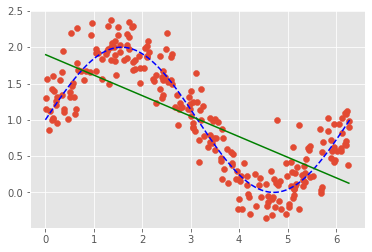

In [132]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE
x_s = data['x_train'].reshape(-1, 1)
y_s = data['y_train'].reshape(-1, 1)


w, b = LSM(x_s, y_s)
w = w[0][0]
b = b[0]
print(f"w: {w}", f"b: {b}", sep='\n')
print(f"MSE: {MSE(y_s, x_s.T.dot(w) + b)}", f"MAE: {MAE(y_s, x_s.T.dot(w) + b)}", sep='\n')

plt.scatter(data['x_train'], data['y_train'])
plt.plot(data['support'], data['values'], 'b--')
plt.plot(data['x_train'], data['x_train'].T.dot(w) + b, 'g')
plt.show()

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

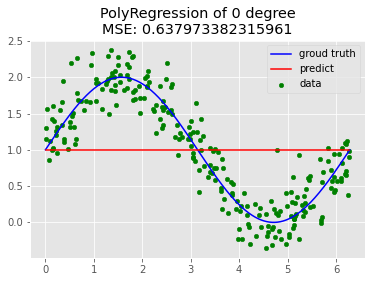

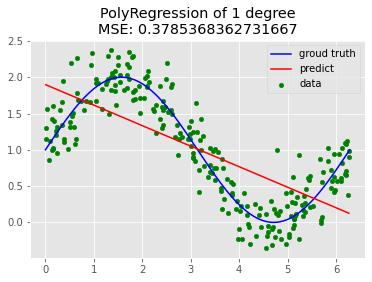

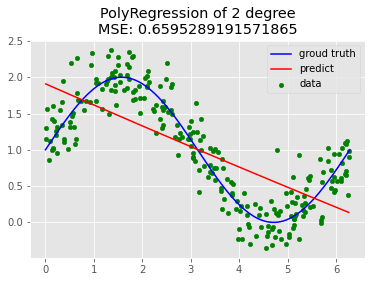

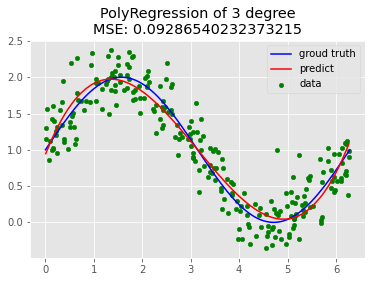

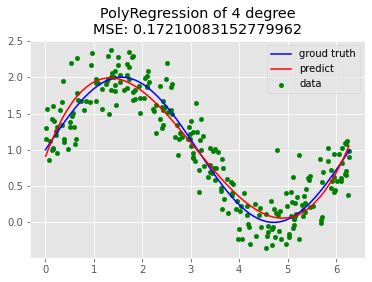

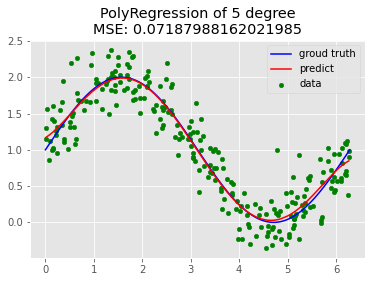

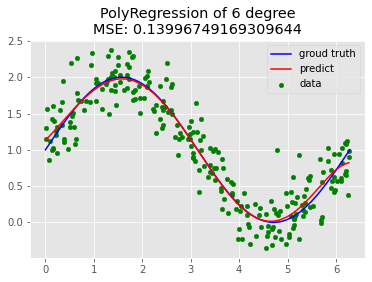

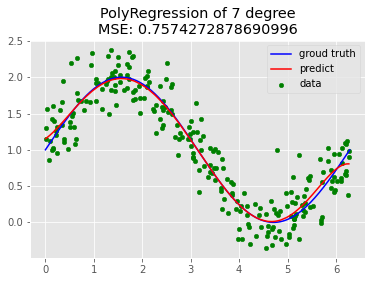

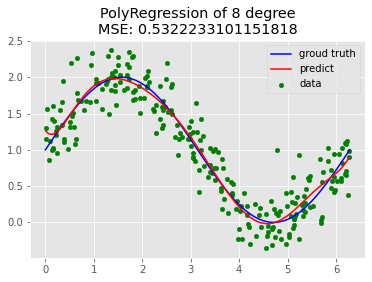

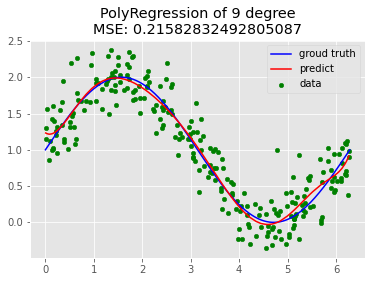

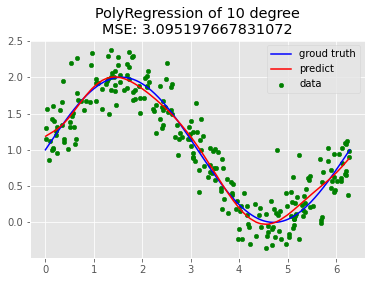

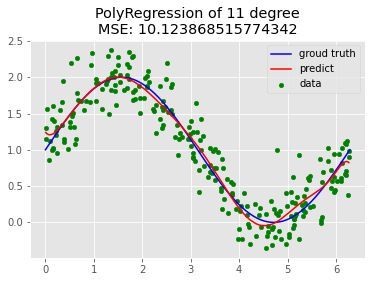

In [133]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

def PolyRegression(degree):
  pipeline = Pipeline([('polynomial_features', PolynomialFeatures(degree=degree)),('linear_regression', LinearRegression())])
  pipeline.fit(data['x_train'].reshape(-1, 1), data['y_train'])
  score = cross_val_score(pipeline, data['x_train'].reshape(-1, 1), data['y_train'], scoring="neg_mean_squared_error", cv=10)

  plt.title(f'PolyRegression of {degree} degree\nMSE: {-score.mean()}');
  plt.scatter(data['x_train'], data['y_train'], 20, 'g', label='data')
  plt.plot(data['support'], data['values'], 'b', label='groud truth')
  plt.plot(data['x_train'], pipeline.predict(data['x_train'].reshape(-1, 1)), 'r', label='predict')
  plt.legend(loc='upper right')
  plt.show()


def MultiplePR(max_degree):
  for degree in range(max_degree):
    PolyRegression(degree)


MultiplePR(12)

## Полином 5й степени подходит лучше по причине наименьшего MSE. При увеличении степени полинома происходит переобучение, и MSE начинает увеличиаться

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston

house_data = load_boston()
x_boston = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y_boston = house_data['target']

## Задание 3.4

MSE on train: 23.05788653476596
MAE on train: 3.4161282872033913
MSE on test: 20.035461081387954
MAE on test: 3.232240046210058


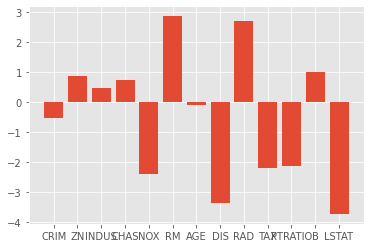

Truncated:
MSE on train: 25.564865762436032
MAE on train: 3.562039558837025
MSE on test: 21.041764941075126
MAE on test: 3.312574342921769


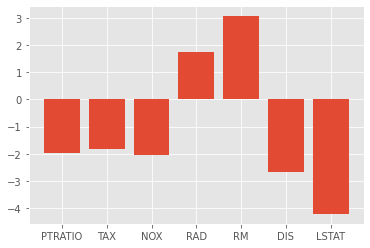

In [170]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def model():
  x_train_boston, x_test_boston, y_train_boston, y_test_boston = train_test_split(x_boston, y_boston, train_size=0.7)

  scaler = StandardScaler()
  x_train_boston = scaler.fit_transform(x_train_boston)
  x_test_boston = scaler.transform(x_test_boston)

  model = LinearRegression()
  model.fit(x_train_boston, y_train_boston)
  y_train_prediction = model.predict(x_train_boston)
  y_test_prediction = model.predict(x_test_boston)

  print(f'MSE on train: {mean_squared_error(y_train_boston, y_train_prediction)}', f'MAE on train: {mean_absolute_error(y_train_boston, y_train_prediction)}', sep='\n')
  print(f'MSE on test: {mean_squared_error(y_test_boston, y_test_prediction)}', f'MAE on test: {mean_absolute_error(y_test_boston, y_test_prediction)}', sep='\n')

  return y_train_boston, y_train_prediction, y_test_boston, y_test_prediction, model.coef_


y_train_boston, y_train_prediction, y_test_boston, y_test_prediction, w = linear()

plt.bar(x_boston.columns, w)
plt.show()

frame = pd.DataFrame(data={"weight": w, "feats": x_boston.columns})
frame = frame.iloc[(np.abs(frame["weight"].values)).argsort()].tail(7)
x_boston = x_boston[frame["feats"]]

print("Truncated:")
y_train, y_train_prediction, y_test, y_test_prediction, w = linear()

plt.bar(x_boston.columns, w)
plt.show()